In [1]:
import json
import pandas as pd


In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
# Cargar la capa temática
natalidad = "hospital_lima.json"
map_data = gpd.read_file(natalidad)
hospitales=map_data
map_data.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_full,operator,water_source,changeset_id,...,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,geometry
0,338350659,way,20.0,,hospital,oncology,,MINSA,,80278687.0,...,Instituto Nacioanal de Enfermedades Neoplásicas,,CamelCaseNick,,,,,,,POLYGON ((-76.99985264236197 -12.1123229502927...
1,6852754574,node,13.0,,hospital,,,Gobierno Regional,,75304307.0,...,Nac. Daniel A. Carrion,,karitotp_peruimport,,,,,,,POINT (-77.12481307235787 -12.06379206619425)
2,604765913,way,27.0,,hospital,general,,Municipalidad Metropolitana de Lima,,71603113.0,...,SISOL Salud Amancaes,,BikeRoad,yes,,,,hospital,,POLYGON ((-77.03080826806723 -12.0170833240266...
3,1846294778,node,10.0,,hospital,,,,,16939359.0,...,Centro de Salud Bahia Blanca,,olgr22,,,,,,,POINT (-77.15869557483229 -11.8353046546265)
4,431592740,way,24.0,,hospital,general,,ESSALUD,,65456273.0,...,Hospital III Suarez Angamos,,Diego Sanguinetti,,,,,,,POLYGON ((-77.02822136129079 -12.1132608014388...


In [87]:
import pandas as pd
h1 = hospitales[hospitales['operator'] == 'MINSA']
h2 = hospitales[hospitales['operator'] == 'ESSALUD' ]
hospital= pd.concat([h1, h2])
hospital.osm_id

0       338350659
7       465231306
8      4458459045
14       39557243
23      372661035
29     4435018834
42      320125239
44      565936062
48      568396654
52     4430998394
54      412486776
59     4286965190
74      618688385
76      320413708
78      320415894
84      172600382
91      549170909
95     4458459045
96      185197319
99     4557320590
100     118291969
108    4235527198
109     187076624
116     419918941
118    4023439900
122     525919060
135     450688741
140     160691934
148     393487901
149     483500696
152     442795790
153     406620279
162    4029952232
4       431592740
9       126861263
16      437642241
34       39413837
36      611484237
43      111800007
103     291986361
124    3358845693
139    1846295645
141    4552742992
142     777346011
143     450128393
150     117005900
157     517495828
Name: osm_id, dtype: int64

In [4]:
map_data=hospital

In [ ]:
#descargar API overpass
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

# Specify the name that is used to seach for the data
place_name = "San Borja,Peru"

# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name, network_type='drive', which_result=1)
type(graph)
ciudad=""
s=1
for i in range(len(place_name)):
   if place_name[i]!=',' and s==1:
        ciudad+=place_name[i]
   if place_name[i]==',':
        s=2
print(ciudad)

In [74]:
nodes, edges = ox.graph_to_gdfs(graph)
print("Nodes:\n", nodes.head(), '\n')
print("Edges:\n", edges.head(), '\n')
len(nodes)

Nodes:
                   y        x       osmid highway  ref  \
2966421505 -12.0613 -77.1494  2966421505     NaN  NaN   
2966421508 -12.0614 -77.1502  2966421508     NaN  NaN   
1738539013 -12.0357 -76.9889  1738539013     NaN  NaN   
6242172932 -11.8823 -77.0137  6242172932     NaN  NaN   
6242172935 -11.8826 -77.0129  6242172935     NaN  NaN   

                                          geometry  
2966421505         POINT (-77.1494197 -12.0613306)  
2966421508         POINT (-77.1501506 -12.0613504)  
1738539013  POINT (-76.98885249999999 -12.0356622)  
6242172932         POINT (-77.0137288 -11.8822897)  
6242172935         POINT (-77.0129215 -11.8825601)   

Edges:
             u           v  key      osmid  highway  oneway  length  \
0  2966421505  3962600070    0  604106361  footway   False  25.110   
1  2966421505   365207961    0  604106362  footway   False  33.007   
2  2966421505  2966421502    0  604106362  footway   False  64.571   
3  2966421508  6379662665    0  398810131

195052

In [123]:
place_name = "Lima,Peru"
area = ox.gdf_from_place(place_name)
print(type(area))


<class 'geopandas.geodataframe.GeoDataFrame'>


Grafico


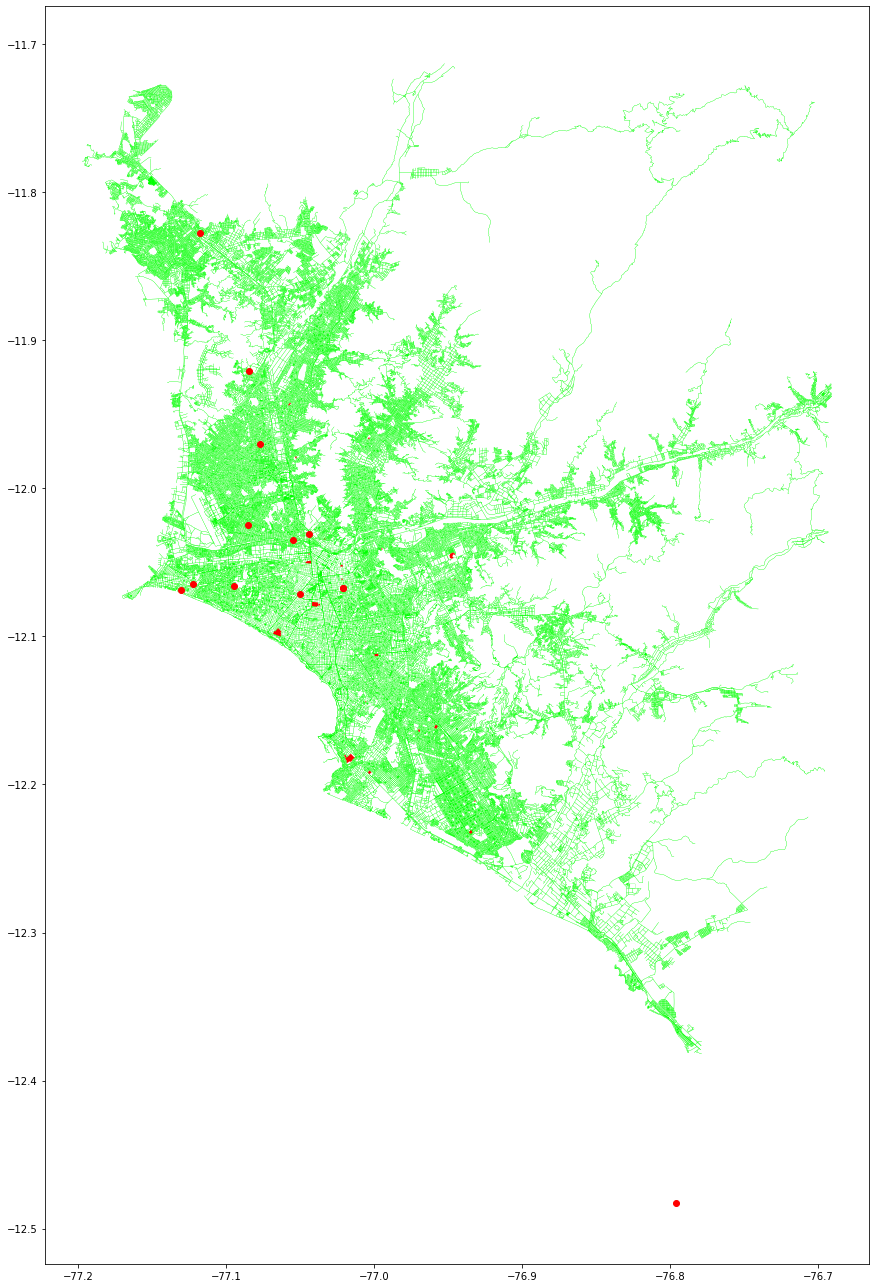

In [59]:

ax = area.plot(facecolor='white',figsize=(18,18))
# Plot street edges
edges.plot(ax=ax, linewidth=0.2,  edgecolor='lime', zorder=1)
# lightskyblue,  markersize=20
# Plot restaurants
print('Grafico')
map_data.plot(ax=ax, color='red', zorder=2)
plt.tight_layout()
#plt.show()
plt.savefig("LimaHosp.tiff")
#fig, ax = ox.plot_graph(ax, fig_height=10, fig_width=12) 

In [93]:

map_data['geometry'] = map_data['geometry'].centroid
map_data.head()
#print(coords)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_full,operator,water_source,changeset_id,...,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,geometry
0,338350659,way,20.0,,hospital,oncology,,MINSA,,80278687.0,...,Instituto Nacioanal de Enfermedades Neoplásicas,,CamelCaseNick,,,,,,,POINT (-76.99852749945883 -12.11259415120124)
7,465231306,way,13.0,,hospital,,,MINSA,,78908832.0,...,Centro de Salud Materno Infantil Ancon,,benjymb,,,,,,,POINT (-77.17278871039244 -11.77449156464193)
8,4458459045,node,17.0,,hospital,,,MINSA,,78167488.0,...,Centro de Salud Infantil El Porvenir,,karitotp_peruimport,,,,,,,POINT (-77.02090806695287 -12.06746015466103)
14,39557243,way,17.0,,hospital,,,MINSA,,81597304.0,...,Hospital Víctor Larco Herrera,,ovruni,,,,,,,POINT (-77.06517047025929 -12.0974346539245)
23,372661035,way,20.0,,hospital,general,,MINSA,,66086812.0,...,Hospital de Emergencias Villa El Salvador,,ovruni,,,,,,,POINT (-76.93484386194791 -12.23215255667802)


In [242]:
import numpy as np
import pandas as pd
import scipy.spatial as spatial
import matplotlib.pyplot as plt
import matplotlib.path as path
import matplotlib as mpl
import smopy
%matplotlib inline
a=map_data['amenity']
o=map_data['operator']
n=map_data['name']

In [253]:
coords=map_data['geometry']
import fiona
from shapely.geometry import shape
import numpy as np
listarray=[]
x1=[]
y1=[]
for pp in coords:
    listarray.append([pp.x, pp.y])
    x1.append([pp.x])
    y1.append([pp.y])
nparray = np.array(listarray)
coord=nparray

In [353]:
x1 = pd.DataFrame(x1)   
y1 = pd.DataFrame(y1)  
n1 = pd.DataFrame(n)
o1 = pd.DataFrame(o)
a1 = pd.DataFrame(a)
x1=pd.DataFrame(x1.values, columns = ["x"])
y1=pd.DataFrame(y1.values, columns = ["y"])
x2=pd.concat([x1, y1],axis=1)
a2=pd.concat([n1, o1,a1],axis=1)

In [365]:
a2=a2.reset_index(drop=True)    
 
co=pd.concat([x2, a2], axis=1, ignore_index=False)


In [391]:

metro=co
metro[metro.columns[0:]].tail(3)

,1,2,3,4,5
44,-77.037148,-12.078581,Complejo Hospitalario Arenales,ESSALUD,hospital
45,-76.945506,-12.061828,Hospital Alcántara,ESSALUD,hospital
46,-76.947592,-12.045399,Hospital Jorge Voto Bernales,ESSALUD,hospital


In [423]:
metro.rename(columns={'x': 1, 'y': 2, 'name': 3, 'operator': 4, 'amenity': 5}, inplace=True)
metro[metro.columns[0:]].tail(10)

,1,2,3,4,5
37,-77.094460,-12.065842,Policlinico Octavio Mongrut,ESSALUD,hospital
38,-77.057228,-11.943168,Hospital Mariano Molina,ESSALUD,hospital
39,-77.044044,-12.044445,Policlínico Ramón Castilla,ESSALUD,hospital
40,-77.130419,-12.068634,Centro de Asistencia CAP III Metropolitano,ESSALUD,hospital
41,-77.122300,-12.064536,Hospital Alberto Sabogal Sologuren,ESSALUD,hospital
42,-77.049835,-12.071483,UBAB Jesús María,ESSALUD,hospital
43,-77.121949,-12.064476,Hospital Alberto Sabogal Sologuren,ESSALUD,hospital
44,-77.037148,-12.078581,Complejo Hospitalario Arenales,ESSALUD,hospital
45,-76.945506,-12.061828,Hospital Alcántara,ESSALUD,hospital
46,-76.947592,-12.045399,Hospital Jorge Voto Bernales,ESSALUD,hospital


In [430]:
# We only extract the district from stations in Paris.
paris = metro['4'].str.startswith('SA').values
# We create a vector of integers with the district
# number of the corresponding station, or 0 if the
# station is not in Paris.
districts = np.zeros(len(paris), dtype=np.int32)
districts[paris] = metro['4'][paris].str.slice(6, 8) \
    .astype(np.int32)
districts[~paris] = 0
ndistricts = districts.max() + 1

In [431]:
lon = metro['1']
lat = metro['2']

In [441]:
m=np.amin(lon)
m

-77.17278871039244

Lowered zoom level to keep map size reasonable. (z = 10)


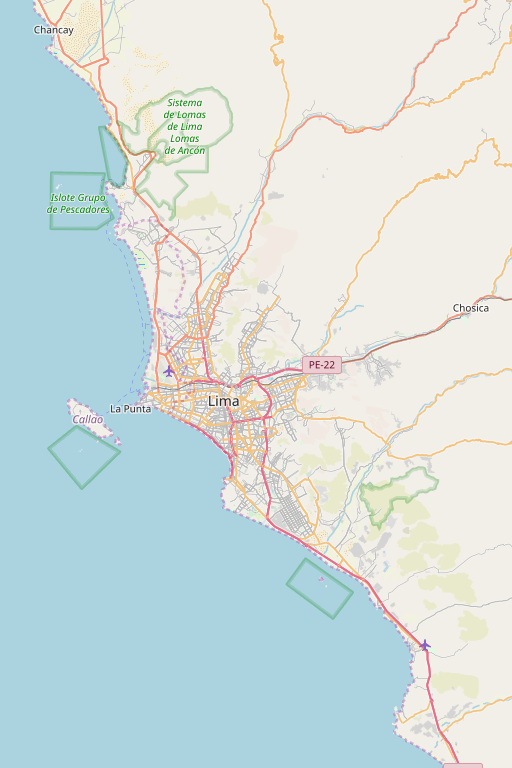

In [443]:

box = (np.amin(lat), np.amin(lon),
       np.amax(lat), np.amax(lon))

m = smopy.Map(box, z=12)
m.show_ipython()

In [445]:
vor = spatial.Voronoi(np.c_[lat, lon])

In [446]:
def voronoi_finite_polygons_2d(vor, radius=None):
    """Reconstruct infinite Voronoi regions in a
    2D diagram to finite regions.
    Source:
    [https://stackoverflow.com/a/20678647/1595060](https://stackoverflow.com/a/20678647/1595060)
    """
    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")
    new_regions = []
    new_vertices = vor.vertices.tolist()
    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()
    # Construct a map containing all ridges for a
    # given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points,
                                  vor.ridge_vertices):
        all_ridges.setdefault(
            p1, []).append((p2, v1, v2))
        all_ridges.setdefault(
            p2, []).append((p1, v1, v2))
    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]
        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue
        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]
        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue
            # Compute the missing endpoint of an
            # infinite ridge
            t = vor.points[p2] - \
                vor.points[p1]  # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal
            midpoint = vor.points[[p1, p2]]. \
                mean(axis=0)
            direction = np.sign(
                np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + \
                direction * radius
            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())
        # Sort region counterclockwise.
        vs = np.asarray([new_vertices[v]
                         for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(
            vs[:, 1] - c[1], vs[:, 0] - c[0])
        new_region = np.array(new_region)[
            np.argsort(angles)]
        new_regions.append(new_region.tolist())
    return new_regions, np.asarray(new_vertices)

In [447]:
regions, vertices = voronoi_finite_polygons_2d(vor)
cells = [m.to_pixels(vertices[region])
         for region in regions]

In [448]:
cmap = plt.cm.Set3
# We generate colors for districts using a color map.
colors_districts = cmap(
    np.linspace(0., 1., ndistricts))[:, :3]
# The color of every polygon, grey by default.
colors = .25 * np.ones((len(districts), 3))
# We give each polygon in Paris the color of
# its district.
colors[paris] = colors_districts[districts[paris]]

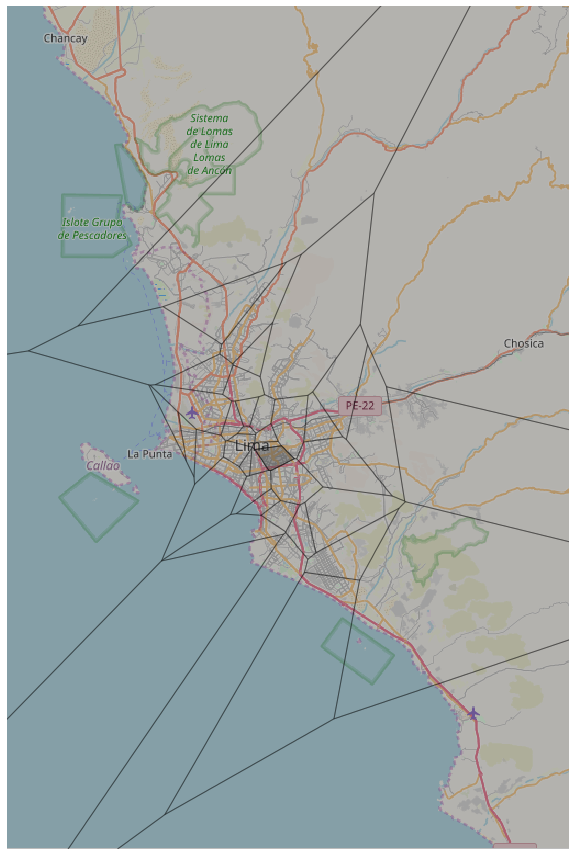

In [451]:
ax = m.show_mpl(figsize=(14, 12))
ax.add_collection(
    mpl.collections.PolyCollection(
        cells, facecolors=colors,
        edgecolors='k', alpha=.35))
plt.savefig('Lima.png')

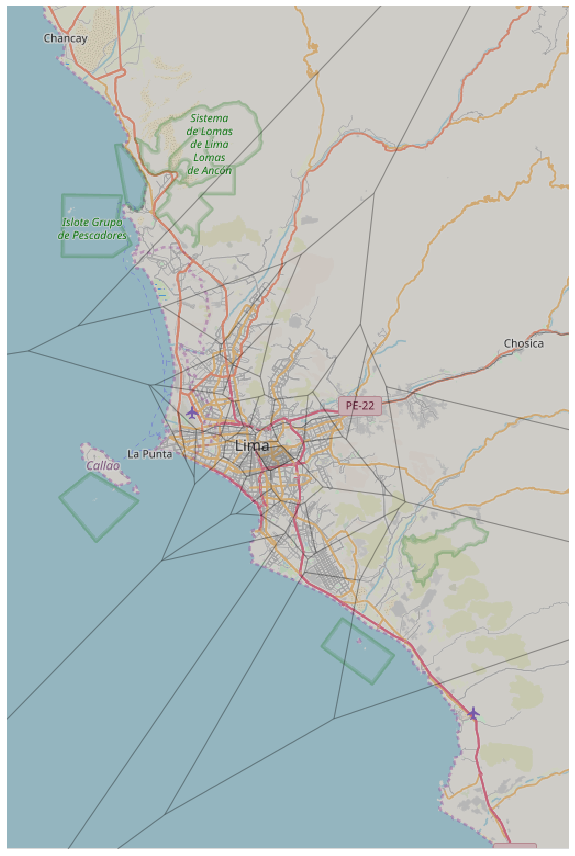

In [505]:
ax = m.show_mpl(figsize=(14, 12))
#ax=m.subplots(figsize=(14, 12))
#ax.scatter(lon, lat)
ax.scatter ( lon, lat, zorder = 2, alpha = 0.9, c = 'b', s = 20)
ax.add_collection(
    mpl.collections.PolyCollection(
        cells, facecolors=colors,
        edgecolors='k', alpha=.2))
plt.savefig('Lima.png')

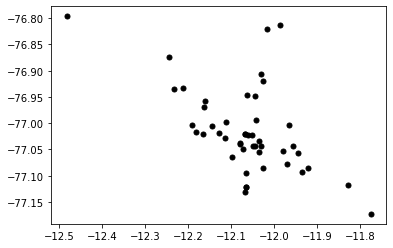

In [496]:
plt.plot(lat, lon, 'ok', markersize=5)

In [155]:
import numpy as np
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#area = world[world.name == 'Peru']

area = area.to_crs(epsg=3395)    # convert to World Mercator CRS
area_shape = area.iloc[0].geometry   # get the Polygon


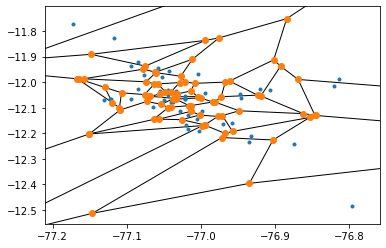

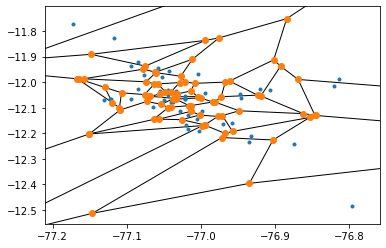

In [178]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(coord, qhull_options = "Qc")
voronoi_plot_2d(vor)

In [183]:
vor.vertices[3] ,vor.vertices[2] 

(array([-76.63183408, -11.26972303]), array([-77.2549594 , -11.91481994]))

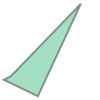

In [185]:
import geopandas
from geopandas import GeoSeries
from shapely.geometry import Polygon
p1 = Polygon([vor.vertices[3],vor.vertices[-1],vor.vertices[1],vor.vertices[2]])
p1

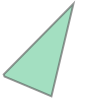

In [186]:
p2 = Polygon([vor.vertices[29],vor.vertices[27],vor.vertices[26],vor.vertices[28]])
p2

In [459]:
lon

0    -76.998527
1    -77.172789
2    -77.020908
3    -77.065170
4    -76.934844
5    -77.055003
6    -76.820321
7    -77.022059
8    -77.020254
9    -77.077429
10   -77.021745
11   -77.117562
12   -77.017745
13   -76.906484
14   -76.919857
15   -77.044315
16   -77.093656
17   -77.020908
18   -77.005768
19   -77.084659
20   -77.052923
21   -76.796254
22   -77.003605
23   -77.003166
24   -77.085179
25   -76.874768
26   -77.043470
27   -76.958310
28   -77.033355
29   -76.813743
30   -77.016771
31   -76.994844
32   -77.043826
33   -77.028139
34   -76.932013
35   -76.969750
36   -77.040002
37   -77.094460
38   -77.057228
39   -77.044044
40   -77.130419
41   -77.122300
42   -77.049835
43   -77.121949
44   -77.037148
45   -76.945506
46   -76.947592
Name: 1, dtype: float64